<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Data_cleaning_of_google_play_store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv("/content/drive/MyDrive/credit risk/googleplaystore(impure).csv")

In [4]:
data.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [7]:
data.shape

(10841, 14)

In [8]:
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
data.dropna(inplace=True)

In [11]:
data.drop(columns = ["Unnamed: 0"], inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [13]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"],errors="coerce")

<ipython-input-13-08cf8a74ddad>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Last Updated"] = pd.to_datetime(data["Last Updated"],errors="coerce")


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   object        
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   object        
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1023.8+ KB


In [15]:
data["Last Updated"] = data["Last Updated"].dt.strftime('%Y-%m-%d')

In [16]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"],errors='coerce')

In [18]:
data["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9360, dtype: datetime64[ns]

In [19]:
data["Installs"] = data["Installs"].str.replace("+","")
data["Installs"] = data["Installs"].str.replace(",","")

In [20]:
data["Installs"] = data["Installs"].astype(int)

In [23]:
data["Reviews"].info()

<class 'pandas.core.series.Series'>
Index: 9360 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
9360 non-null   object
dtypes: object(1)
memory usage: 146.2+ KB


In [ ]:
count=0
for i in data["Reviews"]:
  if i == "3.0M":
    count = count + 1



In [26]:
count

0

In [30]:
data.describe()

,Rating,Installs,Last Updated
count,9360.000000,9.360000e+03,9360
mean,4.191838,1.790875e+07,2017-11-29 13:00:55.384615424
min,1.000000,1.000000e+00,2010-05-21 00:00:00
25%,4.000000,1.000000e+04,2017-10-09 00:00:00
50%,4.300000,5.000000e+05,2018-06-01 00:00:00
75%,4.500000,5.000000e+06,2018-07-24 00:00:00
max,5.000000,1.000000e+09,2018-08-08 00:00:00
std,0.515263,9.126637e+07,NaN


In [ ]:
data.drop(data[data["Reviews"] == "3.0M"].index , inplace=True)

In [31]:
data["Reviews"] = data['Reviews'].astype(int)

In [42]:
print(data[data["Reviews"] == 38].index)

Index([  121,  2171,  2173,  2388,  4125,  4199,  4364,  4449,  4721,  6314,
        6825,  6830,  7649,  7678,  8265,  8363,  8704,  8710,  8992,  9121,
       10249, 10749, 10836],
      dtype='int64')


In [36]:
data["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   int64         
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   int64         
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   object        
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1023.8+ KB


In [44]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

1.You're working as a market analyst for a mobile app development company. Your task is to identify the most promising categories (TOP 5) for launching new free apps based on their average ratings.

```
select category, round(avg(rating),2) as 'average'  from playstore where type='Free'
group by category
order by average desc
limit 5;
```



In [48]:
data["Type"].value_counts()

Type
Free    8715
Paid     645
Name: count, dtype: int64

In [46]:
df = data.loc[data["Type"] == "Free"]

In [52]:
required_columns = ["Category","Rating"]
df = df[required_columns]

In [66]:
df_1.sort_values(by="Rating", ascending=False).round(2)[:5]

,Rating
Category,
EVENTS,4.44
EDUCATION,4.38
ART_AND_DESIGN,4.36
BOOKS_AND_REFERENCE,4.35
PARENTING,4.34


In [65]:
df_1 = df.groupby("Category").mean()
df_1["Rating"].nlargest(5).round(2)

Category
EVENTS                 4.44
EDUCATION              4.38
ART_AND_DESIGN         4.36
BOOKS_AND_REFERENCE    4.35
PARENTING              4.34
Name: Rating, dtype: float64

2. As a business strategist for a mobile app company, your objective is to pinpoint the three categories that generate the most revenue from paid apps.
 This calculation is based on the product of the app price and its number of installations.


```
select category, round(sum(revenue),2) as rev from
(
select *, (Installs*Price)  as revenue from playstore where  type='paid'
)t  group by category
order by rev desc
limit 3;
```



In [71]:
df_2 = data.loc[data["Type"] == "Paid"]

In [76]:
required_columns = ["Category","Installs", "Price"]
df_2 = df_2[required_columns]
df_2["Price"] = data["Price"].str.replace("$","")

In [80]:
df_2["Price"] = df_2["Price"].astype(float)

In [82]:
df_2["Revenue"] = df_2["Price"] * df_2["Installs"]

In [85]:
df_2.groupby("Category").sum().round(2).sort_values(by="Revenue", ascending=False)[:3]

,Installs,Price,Revenue
Category,,,
FAMILY,31218830,2295.75,1.859971e+08
LIFESTYLE,1179110,1960.88,5.758394e+07
GAME,21099262,280.36,4.098684e+07


In [184]:
df_show = df_2.groupby("Category").sum().round(2).sort_values(by="Revenue", ascending=False)[:3]

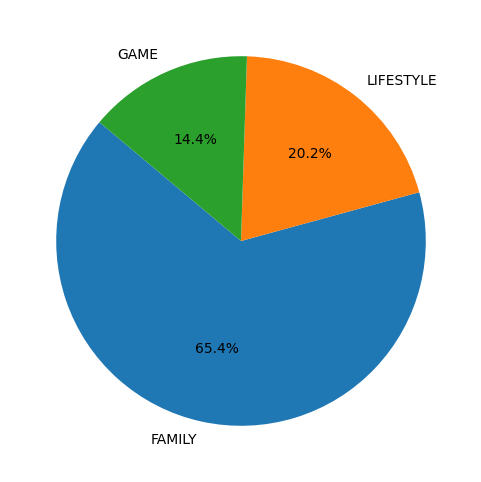

In [186]:
plt.figure(figsize =(6,6))
plt.pie(df_show["Revenue"],labels =df_show.index, autopct='%1.1f%%', startangle=140)
plt.show()

 3. As a data analyst for a gaming company, you're tasked with calculating the percentage of apps within each category.
 This information will help the company understand the distribution of gaming apps across different categories.


```
select * , (cnt/(select count(*) from playstore))*100 as 'percentage' from
(
select category , count(category) as 'cnt' from playstore group by category
)m
```



In [104]:
total = data["Category"].value_counts().sum()

In [107]:
series = data["Category"].value_counts()

In [110]:
per = ((series / total)*100).round(3)

In [118]:
per

Category
FAMILY          18.654
GAME            11.720
TOOLS            7.831
PRODUCTIVITY     3.750
MEDICAL          3.739
Name: count, dtype: float64

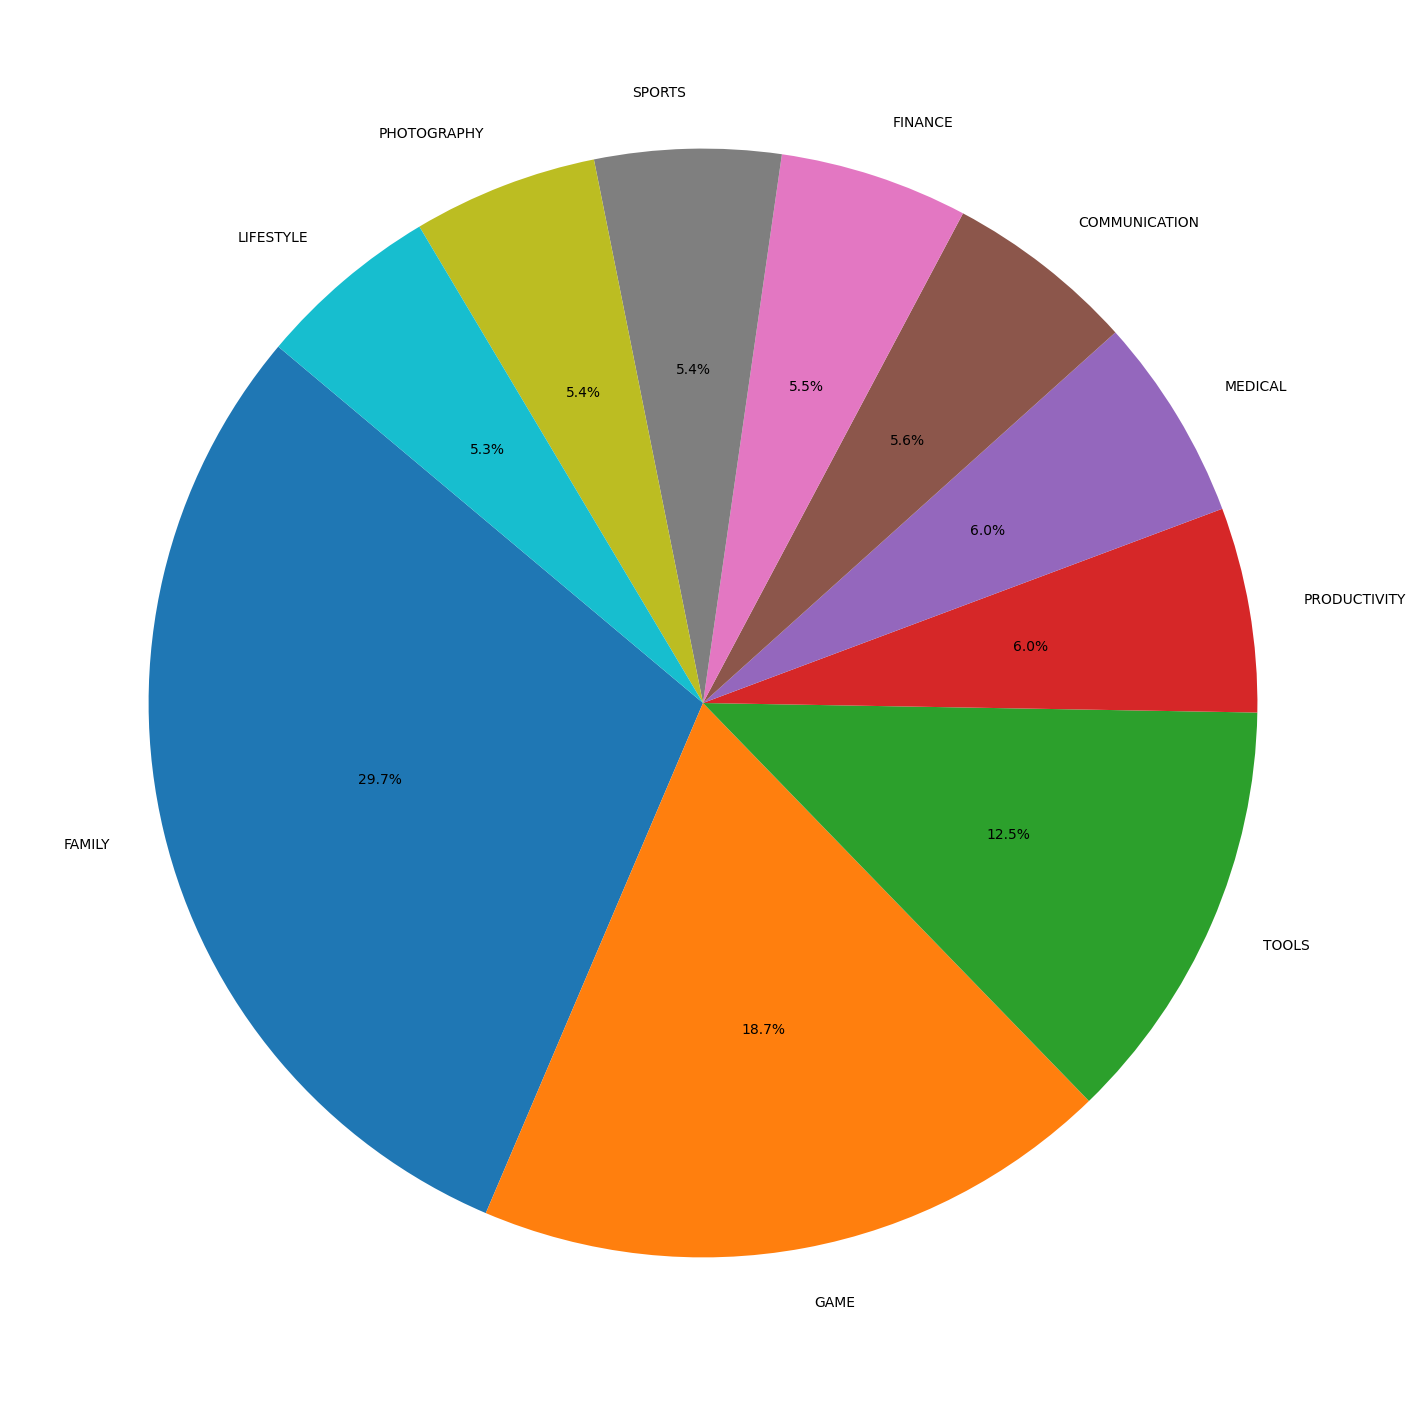

In [121]:
plt.figure(figsize=(18, 18))
plt.pie(per.values[:10],labels=per.index[:10], autopct='%1.1f%%', startangle=140)
plt.show()

4. As a data analyst at a mobile app-focused market research firm you’ll recommend whether the company should develop paid or free apps for each category based on the ratings of that category.




In [123]:
required_columns = ["Category","Rating","Type"]
df_4 = data[required_columns]

In [127]:
df_5 = df_4.groupby("Type")

In [133]:
df_4_free = df_4.loc[df_4["Type"] == "Free"]
df_4_paid = df_4.loc[df_4["Type"] == "Paid"]

In [135]:
df_4_free.drop(columns="Type", inplace = True)

<ipython-input-135-433f389c09d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_free.drop(columns="Type", inplace = True)


In [138]:
df_4_paid.drop(columns="Type", inplace = True)

<ipython-input-138-4186d3a42edb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_paid.drop(columns="Type", inplace = True)


In [154]:
grouped_free = df_4_free.groupby("Category").mean()

In [155]:
grouped_paid = df_4_paid.groupby("Category").mean()

In [156]:
grouped_free.rename(columns = {'Rating':"Rating_Free"},inplace=True)
grouped_paid.rename(columns = {'Rating':"Rating_Paid"},inplace=True)

In [161]:
grouped_free.index
grouped_paid.index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [163]:
df_compare = pd.merge(grouped_free,grouped_paid,how="inner",on="Category")

In [166]:
df_compare["Decision"] = df_compare["Rating_Free"] > df_compare["Rating_Paid"]

In [171]:
df_compare.index

In [174]:
df_compare.reset_index(inplace=True)

In [175]:
df_compare.head(5)

,index,Category,Rating_Free,Rating_Paid,Decision
0,0,ART_AND_DESIGN,4.358621,4.733333,False
1,1,AUTO_AND_VEHICLES,4.184722,4.600000,False
2,2,BOOKS_AND_REFERENCE,4.349412,4.275000,True
3,3,BUSINESS,4.118493,4.200000,False
4,4,COMMUNICATION,4.165359,4.063636,True


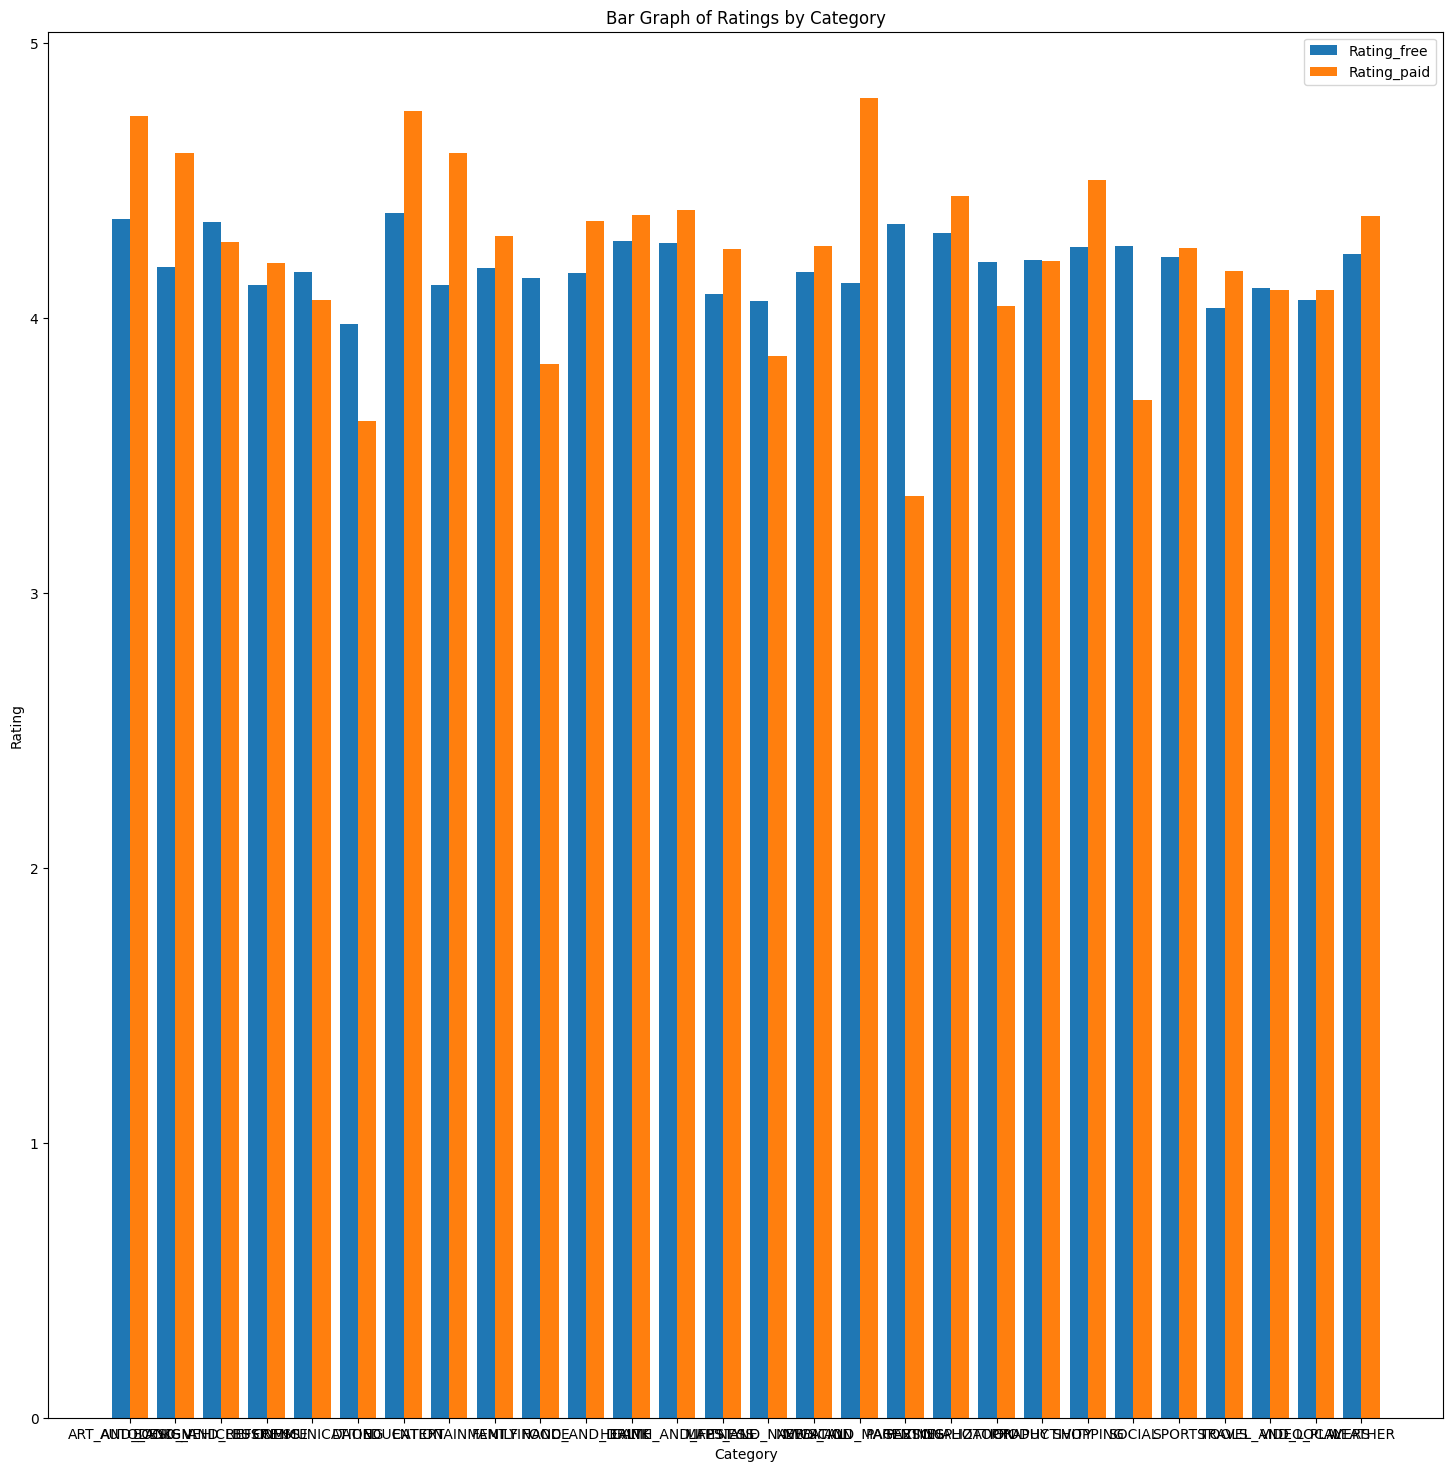

In [183]:
plt.figure(figsize=(18,18))
x = range(len(df_compare))

# Plot the bars for 'Rating_free'
plt.bar(x, df_compare['Rating_Free'], width=0.4, align='center', label='Rating_free')

# Plot the bars for 'Rating_paid' shifted to the right by 0.4 units
plt.bar([i + 0.4 for i in x], df_compare['Rating_Paid'], width=0.4, align='center', label='Rating_paid')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Bar Graph of Ratings by Category')

# Add x-axis labels
plt.xticks([i + 0.2 for i in x], df_compare['Category'])

# Add legend
plt.legend()

# Show the plot
plt.show()